# Function to automatic merge and fill missing values



## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated. 

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [3]:
def merge_and_fill(DataFrameMain, DataFrameOpinion):
  # merge
  NewDataFrame = pd.merge(left = DataFrameMain,
                          right = DataFrameOpinion,
                          left_on = 'DATE',
                          right_on = 'date',
                          how = 'left')
  
  # drop the date column
  NewDataFrame.drop('date', axis = 1, inplace = True)

  # creating the 'flag' column
  NewDataFrame['flag'] = NewDataFrame['OPINION'].isna()

  #fill na
  NewDataFrame['WEATHER_CODE_EVENING'].fillna(NewDataFrame['WEATHER_CODE_EVENING'].mean(), inplace=True)
  NewDataFrame['TOTAL_SNOW_MM'].fillna(0.0, inplace = True)
  NewDataFrame['UV_INDEX'].fillna(NewDataFrame['UV_INDEX'].median(), inplace = True)
  NewDataFrame['SUNHOUR'].fillna(method='ffill', inplace = True)
  NewDataFrame['OPINION'].fillna('unknown', inplace = True)

  # creating month column
  NewDataFrame['DATE'] = pd.to_datetime(NewDataFrame['DATE'], format = '%Y-%m-%d')
  NewDataFrame['MONTH'] = NewDataFrame['DATE'].apply(lambda x: x.month)

  # creating day column
  NewDataFrame['DAY'] = NewDataFrame['DATE'].apply(lambda x: x.day)

  # translation of 'OPINION'
  def translate(string):
    dico = {'bad' :'mauvais', 'very bad':'très mauvais', 'not good not bad' : 'ni bon ni mauvais', 'good' : 'bien', 'very good' : 'très bien'}
    return dico[string] if string in dico.keys() else string
  
  NewDataFrame['OPINION'] = NewDataFrame['OPINION'].apply(translate)

  return NewDataFrame



In [4]:
test = merge_and_fill(df_main, df_opinion)

In [5]:
test.shape

(365, 23)

## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [6]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv

# initilize an empty DF:
final_df = pd.DataFrame()

# loop to get all the DF from 2010 to 2019:
for year in range(2010, 2019):

  # change the year.dtype to str
  str_year = str(year)

  # Collect the link et get the DF
  link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_" + str_year + ".csv"
  link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_" + str_year + ".csv"
  df_main = pd.read_csv(link_main)
  df_opinion = pd.read_csv(link_opinion)

  # apply the merge_and_fill function created below to merge df_main & df_opinion per year:
  df_year = merge_and_fill(df_main, df_opinion)

  # Concatenate all the df_year created:
  final_df = pd.concat([final_df, df_year])



In [7]:
#j'ai 23 colonnes car dans ma fonction j'ai enlevé la colonne Date en double
final_df.shape

(3287, 23)

## Add 2019 & 2020

In [8]:
link2019 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
link2020 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"

In [9]:
df_2019 = pd.read_csv(link2019)
df_2020 = pd.read_csv(link2020)
df2019_2020 = pd.concat([df_2019, df_2020])

In [10]:
df2019_2020.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


In [12]:
df2019_2020.isna().sum()

DATE                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
TEMPERATURE_MORNING_C     0
TEMPERATURE_NOON_C        0
TEMPERATURE_EVENING_C     0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
HEATINDEX_MAX_C           0
DEWPOINT_MAX_C            0
WINDTEMP_MAX_C            0
WEATHER_CODE_MORNING      0
WEATHER_CODE_NOON         0
WEATHER_CODE_EVENING      0
TOTAL_SNOW_MM             0
UV_INDEX                  0
SUNHOUR                   0
OPINION                   0
MONTH                     0
DAY                       0
dtype: int64

In [21]:
# creating the 'flag' column
df2019_2020['flag'] = df2019_2020['OPINION'].isna()

# creating month column
df2019_2020['DATE'] = pd.to_datetime(df2019_2020['DATE'], format = '%Y-%m-%d')
df2019_2020['MONTH'] = df2019_2020['DATE'].apply(lambda x: x.month)

# creating day column
df2019_2020['DAY'] = df2019_2020['DATE'].apply(lambda x: x.day)

# translation of 'OPINION'
def translate(string):
  dico = {'bad' :'mauvais', 'very bad':'très mauvais', 'not good not bad' : 'ni bon ni mauvais', 'good' : 'bien', 'very good' : 'très bien'}
  return dico[string] if string in dico.keys() else string

df2019_2020['OPINION'] = df2019_2020['OPINION'].apply(translate)
final_df = pd.concat([final_df, df2019_2020], ignore_index=True)

# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 11 seasonality for the 11 summers/winters alternance.




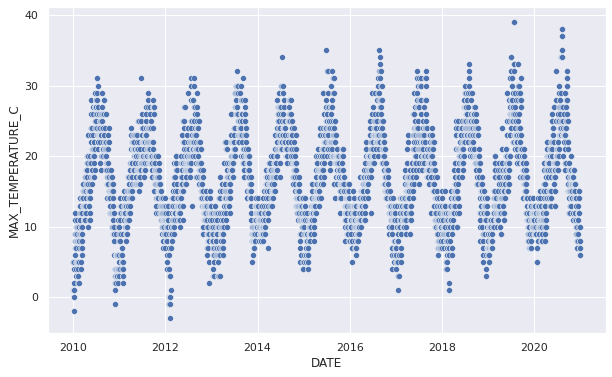

In [22]:
plt.figure(figsize = (10, 6))
sns.set_theme()
final_df['DATE'] = pd.to_datetime(final_df['DATE'])
sns.scatterplot(x='DATE', y ='MAX_TEMPERATURE_C', data=final_df)
plt.show()


Find appropriate dataviz to answer to this question : 

Which year had the best weather? Are years very different or not ?


In [23]:

# creation colonne YEAR
final_df['DATE'] = pd.to_datetime(final_df['DATE'], format = '%Y-%m-%d')
final_df['YEAR'] = final_df['DATE'].apply(lambda x : (x).year)

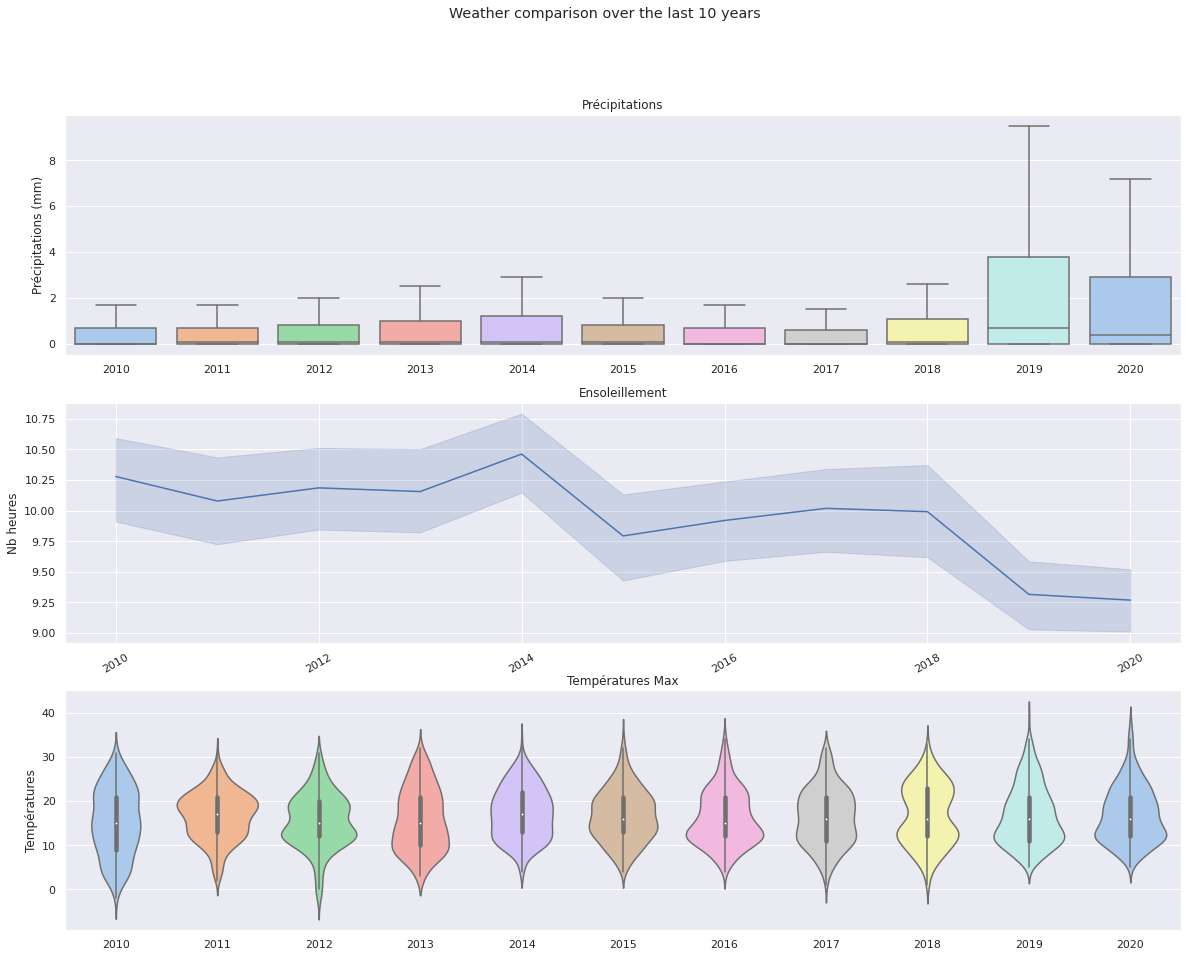

In [30]:
fig, ax = plt.subplots(3,1, figsize=(20,15))
fig.suptitle('Weather comparison over the last 10 years')


#boxplot pour les précipitations
ax1 = plt.subplot(311)
sns.boxplot(ax = ax1, x='YEAR', y = 'PRECIP_TOTAL_DAY_MM', data=final_df, sym="" , palette = 'pastel') #sym ="" pour enlever les outliers du boxplot
ax1.set_title('Précipitations')
ax1.set_xlabel('')
ax1.set_ylabel('Précipitations (mm)')


# scatter pour sunhour et la date
ax2 = plt.subplot(312)
sns.lineplot(ax=ax2, x="YEAR", y ='SUNHOUR', data=final_df, palette='pastel')
ax2.set_title('Ensoleillement')
ax2.set_xlabel('')
ax2.set_ylabel('Nb heures')
ax2.tick_params(axis='x', rotation=30)


#Violinplot pour température max
ax3 = plt.subplot(313)
sns.violinplot(ax=ax3, y= 'MAX_TEMPERATURE_C', x='YEAR', data=final_df, palette ='pastel')
ax3.set_title('Températures Max')
ax3.set_xlabel('')
ax3.set_ylabel('Températures')


plt.show()

Pour moi, l'année 2014 a eu le meilleur temps, pas de températures négatives, des tempréatures maximales pas trop élevés non plus. C'est également cette année 2014 où il y a eu le plus d'heures d'ensoleillement. Bien que les précipitations ont été plus élevées ques les autres années de 2010 à 2017, cela reste à un niveau convenable et utile (notamment pour l'agriculture). 